# Lille Metropole Dataset - Air Quality

https://fr.wikipedia.org/wiki/Indice_de_qualit%C3%A9_de_l%27air

Le nouvel indice de qualité de l’air ATMO est un indicateur journalier gradué de 1 (bon) à 6 (extrêmement mauvais) qui permet de caractériser de manière simple et globale la qualité de l’air d’une agglomération urbaine.

Il se compose de 5 sous-indices, chacun étant représentatif d'un polluant de l'air :
- dioxyde d'azote (NO2 ou code_no2)
- dioxyde de soufre (SO2 ou code_so2)
- ozone (O3 ou code_o3)
- particules fines de moins de 10mm (PM10 ou code_pm10)
- particules fines de moins de 2.5mm (PM2.5 ou code_pm25)

Le sous-indice le plus élevé détermine l'indice du jour.

Il est calculé à partir des mesures des stations représentatives de la pollution de fond. Il ne prend pas en compte les phénomènes de proximité (automobile ou industriel).

| O3         | SO2       | NO2       | PM10      | PM2.5   | Niveau              |
|------------|-----------|-----------|-----------|---------|---------------------|
| 0 à 50     | 0 à 100   | 0 à 40    | 0 à 20    | 0 à 10  | Bon                 |
| 50 à 100   | 100 à 200 | 40 à 90   | 20 à 40   | 10 à 20 | Moyen               |
| 100 à 130  | 200 à 350 | 90 à 120  | 40 à 50   | 20 à 25 | Dégradé             |
| 130 à 240  | 350 à 500 | 120 à 230 | 50 à 100  | 25 à 50 | Mauvais             |
| 240 à 380  | 500 à 750 | 230 à 340 | 100 à 150 | 50 à 75 | Très mauvais        |
| > 380      | > 750     | > 340     | > 150     | > 75    | Extrêmement mauvais |	 	 	 	 	

## 1. Setting-Up

#### 1.1 Importing librairies & modules

In [219]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from cycler import cycler # used in the plot customization part 
import seaborn as sns
import requests
import os
import time # provides various time-related functions
from datetime import datetime

#### 1.2. Creating the relevant folders and paths

In [220]:
# Defining current folder as our main directory
dirname = os.getcwd()

# Getting current date
datestr = time.strftime("%Y-%m-%d")

# location folders variables
data_in = dirname + "\\da_data_raw\\" + datestr + "\\"
data_out = dirname + "\\da_data_workfiles\\" + datestr + "\\"

# Checking if data_in path is not present, then create it
if not os.path.exists(data_in):
    os.makedirs(data_in)
    print(f"Directory Created: {data_in}")
    
# Checking if data_out path is not present then create it
if not os.path.exists(data_out):
    os.makedirs(data_out)
    print(f"Directory Created: {data_out}")
    
# Printing main directories we will work with
print(f"\nMain directory: {dirname}")
print(f"Raw data folder: {data_in}")
print(f"Workfile folder: {data_out}")

Directory Created: c:\Users\33671\Documents\Python\MEL_air-quality\da_data_raw\2022-10-23\
Directory Created: c:\Users\33671\Documents\Python\MEL_air-quality\da_data_workfiles\2022-10-23\

Main directory: c:\Users\33671\Documents\Python\MEL_air-quality
Raw data folder: c:\Users\33671\Documents\Python\MEL_air-quality\da_data_raw\2022-10-23\
Workfile folder: c:\Users\33671\Documents\Python\MEL_air-quality\da_data_workfiles\2022-10-23\


#### 1.3 Verifying the api response

In [221]:
dataset_id = "indice-qualite-de-lair"
format = "json"
limit = "10"
r = requests.get(f"https://opendata.lillemetropole.fr/api/v2/catalog/datasets/{dataset_id}/exports/{format}?limit={limit}", 
                 timeout=2)

print(f"URL: {r.url}")
print(f"HTTP Response Status Code: {r.status_code}") 
print(f"HTTP Error: {r.raise_for_status()}")
print(f"Encoding: {r.encoding}")
print(f"Header content type: {r.headers.get('content-type')}")
print(f"Cookies: {r.cookies}")

r.close()

URL: https://opendata.lillemetropole.fr/api/v2/catalog/datasets/indice-qualite-de-lair/exports/json?limit=10
HTTP Response Status Code: 200
HTTP Error: None
Encoding: utf-8
Header content type: application/json; charset=utf-8
Cookies: <RequestsCookieJar[]>


#### 1.4 Data Collection

In [222]:
dataset_id = "indice-qualite-de-lair"
format = "json"
limit = "-1" # argument to pass to get the full dataset 
df_raw = pd.read_json(f"https://opendata.lillemetropole.fr/api/v2/catalog/datasets/{dataset_id}/exports/{format}?limit={limit}")

# used temporarily when API was unavailable: df_raw = pd.read_csv('C:\\Users\\33671\\Documents\\Python\\MEL_air-quality\\da_data_raw\\2022-10-20\\air-quality-index_2022-10-20_17-06-10.csv')

#### 1.5 Getting a first feel of the data

In [223]:
df_raw.head()

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
0,2022-05-26T02:00:00+00:00,2,Moyen,#50CCAA,2022-05-27T14:10:06+00:00,Atmo HDF,commune,59173,DEULEMONT,1,...,1,2.97014,50.72835,697887,7070184,2154,539006,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.9701400000000002, 'lat': 50.72835}",59890
1,2022-05-26T02:00:00+00:00,2,Moyen,#50CCAA,2022-05-27T14:10:06+00:00,Atmo HDF,commune,59201,ERQUINGHEM LE SEC,1,...,1,2.93325,50.61081,695267,7057087,2154,539034,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.93325, 'lat': 50.61081}",59320
2,2022-05-26T02:00:00+00:00,2,Moyen,#50CCAA,2022-05-27T14:10:06+00:00,Atmo HDF,commune,59275,GRUSON,1,...,1,3.21576,50.59218,715303,7055031,2154,539105,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.21576, 'lat': 50.59217999999999}",59152
3,2022-05-26T02:00:00+00:00,2,Moyen,#50CCAA,2022-05-27T14:10:06+00:00,Atmo HDF,commune,59278,HALLENNES LEZ HAUBOURDIN,1,...,1,2.95469,50.61192,696787,7057210,2154,539108,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.9546900000000003, 'lat': 50.61192}",59320
4,2022-05-26T02:00:00+00:00,2,Moyen,#50CCAA,2022-05-27T14:10:06+00:00,Atmo HDF,commune,59316,HOUPLIN ANCOISNE,1,...,1,2.99469,50.56974,699623,7052509,2154,539145,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.9946900000000003, 'lat': 50.56974}",59263


In [224]:
df_raw.tail()

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
27735,2022-10-21T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-22T14:10:07+00:00,Atmo HDF,commune,59220,FACHES THUMESNIL,2,...,1,3.07234,50.59411,705130,7055227,2154,1098064,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.07234, 'lat': 50.59410999999999}",59155
27736,2022-10-21T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-22T14:10:07+00:00,Atmo HDF,commune,59279,HALLUIN,2,...,1,3.12644,50.77478,708935,7075365,2154,1098232,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.12644, 'lat': 50.77478}",59250
27737,2022-10-21T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-22T14:10:07+00:00,Atmo HDF,commune,59281,HANTAY,1,...,1,2.86854,50.53797,690665,7048977,2154,1098238,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.8685400000000003, 'lat': 50.53796999...",59480
27738,2022-10-21T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-22T14:10:07+00:00,Atmo HDF,commune,59316,HOUPLIN ANCOISNE,1,...,1,2.99469,50.56974,699623,7052509,2154,1098340,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.9946900000000003, 'lat': 50.56974}",59263
27739,2022-10-21T02:00:00+00:00,2,Moyen,#50CCAA,2022-10-22T14:10:07+00:00,Atmo HDF,commune,59332,LANNOY,1,...,1,3.21030,50.66620,714893,7063278,2154,1098388,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.2103, 'lat': 50.6662}",59390


In [225]:
df_raw.sample(5)

,date_ech,code_qual,lib_qual,coul_qual,date_dif,source,type_zone,code_zone,lib_zone,code_no2,...,code_pm25,x_wgs84,y_wgs84,x_reg,y_reg,epsg_reg,objectid,geo_shape,geo_point_2d,code_posta
8878,2022-03-07T01:00:00+00:00,2,Moyen,#50CCAA,2022-03-08T14:10:09+00:00,Atmo HDF,commune,59386,MARQUETTE LEZ LILLE,2,...,2,3.05917,50.67413,704190,7064143,2154,243668,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.059169999999999, 'lat': 50.67413}",59520
21300,2022-06-22T02:00:00+00:00,4,Mauvais,#FF5050,2022-06-23T14:10:07+00:00,Atmo HDF,commune,59343,LESQUIN,1,...,2,3.11221,50.58951,707959,7054718,2154,637686,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.11221, 'lat': 50.58951}",59810
4206,2022-08-09T02:00:00+00:00,3,Dégradé,#F0E641,2022-08-10T14:10:07+00:00,Atmo HDF,commune,59005,ALLENNES LES MARAIS,2,...,1,2.94828,50.54145,696328,7049358,2154,819229,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.94828, 'lat': 50.54145}",59251
238,2022-04-10T02:00:00+00:00,2,Moyen,#50CCAA,2022-04-11T14:10:06+00:00,Atmo HDF,commune,59173,DEULEMONT,2,...,1,2.97014,50.72835,697887,7070184,2154,364712,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.9701400000000002, 'lat': 50.72835}",59890
18338,2022-05-31T02:00:00+00:00,2,Moyen,#50CCAA,2022-06-01T14:10:07+00:00,Atmo HDF,commune,59437,NOYELLES LES SECLIN,1,...,1,3.02256,50.57303,701600,7052876,2154,558204,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 3.02256, 'lat': 50.573029999999996}",59139


#### 1.6 Exporting raw data to CSV

In [226]:
# Generating a raw csv file with timestamp included in the name
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = "air-quality-index_" + timestr + ".csv"
print(f"file name: {file_name}")

df_raw.to_csv(data_in + file_name, index = False)

file name: air-quality-index_2022-10-23_11-49-58.csv


## 2. Preparing Data for Analysis

#### 2.1 Basic exploration

In [227]:
# data.info has the merits of combining many functions together
# - see if there's null values replacing `df.isnull().sum()`
# - see the dtype of each colymns replacing `df.dtypes`
# - see the shape of the dataframe replacing `df.shape`
# - estimating the memory usage replacing `df.memory_usage`
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27740 entries, 0 to 27739
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_ech      27740 non-null  object 
 1   code_qual     27740 non-null  int64  
 2   lib_qual      27740 non-null  object 
 3   coul_qual     27740 non-null  object 
 4   date_dif      27740 non-null  object 
 5   source        27740 non-null  object 
 6   type_zone     27740 non-null  object 
 7   code_zone     27740 non-null  int64  
 8   lib_zone      27740 non-null  object 
 9   code_no2      27740 non-null  int64  
 10  code_so2      27740 non-null  int64  
 11  code_o3       27740 non-null  int64  
 12  code_pm10     27740 non-null  int64  
 13  code_pm25     27740 non-null  int64  
 14  x_wgs84       27740 non-null  float64
 15  y_wgs84       27740 non-null  float64
 16  x_reg         27740 non-null  int64  
 17  y_reg         27740 non-null  int64  
 18  epsg_reg      27740 non-nu

In [228]:
# Quick overview of date_ech to see the formatting used
df_raw["date_ech"].value_counts(ascending=True)

2022-05-26T02:00:00+00:00    95
2022-07-23T02:00:00+00:00    95
2022-07-22T02:00:00+00:00    95
2022-07-21T02:00:00+00:00    95
2022-07-20T02:00:00+00:00    95
                             ..
2022-03-05T01:00:00+00:00    95
2022-03-04T01:00:00+00:00    95
2022-03-03T01:00:00+00:00    95
2022-02-25T01:00:00+00:00    95
2022-09-18T02:00:00+00:00    95
Name: date_ech, Length: 292, dtype: int64

In [229]:
# Quick overview of date_dif to see the formatting used
df_raw["date_dif"].value_counts(ascending=True)

2022-05-27T14:10:06+00:00     95
2022-07-24T14:10:07+00:00     95
2022-07-23T14:10:07+00:00     95
2022-07-22T14:10:07+00:00     95
2022-07-21T14:10:07+00:00     95
                            ... 
2022-03-08T14:10:09+00:00     95
2022-03-07T14:10:07+00:00     95
2022-03-05T14:10:07+00:00     95
2022-09-19T14:10:06+00:00     95
2022-10-22T14:10:07+00:00    285
Name: date_dif, Length: 290, dtype: int64

In [230]:
# Checking how many unique "lib_zone" (i.e. cities) we observe each day in this dataframe
df_raw["lib_zone"].nunique()

95

In [231]:
df_raw["lib_zone"].value_counts(ascending=True)

DEULEMONT                292
WILLEMS                  292
LOMPRET                  292
LILLE                    292
ILLIES                   292
                        ... 
LESQUIN                  292
HEM                      292
FRETIN                   292
WAMBRECHIES              292
SAINT ANDRE LEZ LILLE    292
Name: lib_zone, Length: 95, dtype: int64

In [232]:
# Creating a copy of the dataframe
df = df_raw.copy()

#### 2.2 Dealing with duplicates

When I started this project, I was getting duplicates (days with 190 occurences of the same date instead of 95). However, it's not the case anymore. I'm still keeping this **2.2 Duplicates** section in case it happens again when we query the API in the future. 

Performing a `df.duplicated().sum()` gives me a *TypeError: unhashable type: 'dict'* error. This is because columns **geo_shape** and **geo_point_2d** are dictionaries. I'll exclude them. 

In [233]:
# Check duplication of df excluding geo_shape and geo_point_2d
df.duplicated(df.columns.difference(['geo_shape', 'geo_point_2d'])).sum()

0

I found this **0** result to be strange given my initial observations with dates **value_counts** and decided to proceed further by including columns one by one to see if duplicates emerge

In [234]:
# I used to get 817 duplicates but not anymore. Keeping the code just in case it happens again. 
df.duplicated(['date_ech', 'date_dif', 'code_zone', 'lib_zone', 'code_qual', 'lib_qual', 'coul_qual', 
               'source', 'type_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25', 
               'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg']).sum()

0

In [235]:
df.duplicated(['date_ech', 'date_dif', 'code_zone', 'lib_zone', 'code_qual', 'lib_qual', 'coul_qual', 
               'source', 'type_zone', 'code_no2', 'code_so2', 'code_o3', 'code_pm10', 'code_pm25', 'x_wgs84', 
               'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg', 'objectid']).sum()

0

There are (were) numerous duplicates if we ignore **objectid**. Since all other variables are similar and we expect one observation per day per city, I will remove **objectid**, then remove duplicates. 

In [236]:
# Removeing objectid column
df.drop(columns=['objectid'], inplace=True)

# Converting **geo_shape** and **geo_point_2d** to string
df['geo_shape'] = df.geo_shape.astype(str)
df['geo_point_2d'] = df.geo_point_2d.astype(str)

In [237]:
df.duplicated().sum()

0

In [238]:
df.drop_duplicates(inplace=True)

#### 2.3 Removing and rearranging columns

In [239]:
# Removing
df.drop(columns=['coul_qual', 'date_dif', 'source', 'type_zone', 'code_zone', 'x_wgs84', 'y_wgs84', 'x_reg', 'y_reg', 'epsg_reg', 'geo_shape', 'geo_point_2d'], 
        errors='ignore', 
        inplace=True)

df.head()

,date_ech,code_qual,lib_qual,lib_zone,code_no2,code_so2,code_o3,code_pm10,code_pm25,code_posta
0,2022-05-26T02:00:00+00:00,2,Moyen,DEULEMONT,1,1,2,1,1,59890
1,2022-05-26T02:00:00+00:00,2,Moyen,ERQUINGHEM LE SEC,1,1,2,1,1,59320
2,2022-05-26T02:00:00+00:00,2,Moyen,GRUSON,1,1,2,1,1,59152
3,2022-05-26T02:00:00+00:00,2,Moyen,HALLENNES LEZ HAUBOURDIN,1,1,2,1,1,59320
4,2022-05-26T02:00:00+00:00,2,Moyen,HOUPLIN ANCOISNE,1,1,2,1,1,59263


In [240]:
# Renaming columns
cols = ['date', 'quality_code', 'quality_label', 'city', 'no2', 'so2', 'o3', 'pm10', 'pm2-5', 'zip_code']
df.columns = cols

df.head()

,date,quality_code,quality_label,city,no2,so2,o3,pm10,pm2-5,zip_code
0,2022-05-26T02:00:00+00:00,2,Moyen,DEULEMONT,1,1,2,1,1,59890
1,2022-05-26T02:00:00+00:00,2,Moyen,ERQUINGHEM LE SEC,1,1,2,1,1,59320
2,2022-05-26T02:00:00+00:00,2,Moyen,GRUSON,1,1,2,1,1,59152
3,2022-05-26T02:00:00+00:00,2,Moyen,HALLENNES LEZ HAUBOURDIN,1,1,2,1,1,59320
4,2022-05-26T02:00:00+00:00,2,Moyen,HOUPLIN ANCOISNE,1,1,2,1,1,59263


In [241]:
# Moving columns
city = df.pop('city')
df.insert(1, 'city', city)
del city

zip_code = df.pop('zip_code')
df.insert(2, 'zip_code', zip_code)
del zip_code

quality_label = df.pop('quality_label')
df.insert(3, 'quality_label', quality_label)
del quality_label

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5
0,2022-05-26T02:00:00+00:00,DEULEMONT,59890,Moyen,2,1,1,2,1,1
1,2022-05-26T02:00:00+00:00,ERQUINGHEM LE SEC,59320,Moyen,2,1,1,2,1,1
2,2022-05-26T02:00:00+00:00,GRUSON,59152,Moyen,2,1,1,2,1,1
3,2022-05-26T02:00:00+00:00,HALLENNES LEZ HAUBOURDIN,59320,Moyen,2,1,1,2,1,1
4,2022-05-26T02:00:00+00:00,HOUPLIN ANCOISNE,59263,Moyen,2,1,1,2,1,1


#### 2.4 Conversions

In [242]:
# lower cases
df['quality_label'] = df['quality_label'].str.lower()
df['city'] = df['city'].str.lower()

In [243]:
df.dtypes

date             object
city             object
zip_code          int64
quality_label    object
quality_code      int64
no2               int64
so2               int64
o3                int64
pm10              int64
pm2-5             int64
dtype: object

In [244]:
# Convert date 
df['date'] = pd.to_datetime(df['date']).dt.date
df["date"] = pd.to_datetime(df["date"]).dt.normalize() 

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5
0,2022-05-26,deulemont,59890,moyen,2,1,1,2,1,1
1,2022-05-26,erquinghem le sec,59320,moyen,2,1,1,2,1,1
2,2022-05-26,gruson,59152,moyen,2,1,1,2,1,1
3,2022-05-26,hallennes lez haubourdin,59320,moyen,2,1,1,2,1,1
4,2022-05-26,houplin ancoisne,59263,moyen,2,1,1,2,1,1


In [245]:
df.dtypes

date             datetime64[ns]
city                     object
zip_code                  int64
quality_label            object
quality_code              int64
no2                       int64
so2                       int64
o3                        int64
pm10                      int64
pm2-5                     int64
dtype: object

#### 2.5 Enriching data

To facilitate data manipulation later on, let's add some usefull date related columns

In [246]:
# Using index since date column is my index
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday #The day of the week with Monday=0, Sunday=6.
df['week_of_year'] = df.date.dt.isocalendar().week

# Sorting  by date then city
df.sort_values(by=['date', 'city'], inplace=True)

df.head()

,date,city,zip_code,quality_label,quality_code,no2,so2,o3,pm10,pm2-5,year,month,day,weekday,week_of_year
23380,2022-01-01,allennes les marais,59251,moyen,2,1,1,2,2,2,2022,1,1,5,52
3272,2022-01-01,annoeullin,59112,moyen,2,1,1,2,2,2,2022,1,1,5,52
15284,2022-01-01,anstaing,59152,moyen,2,2,1,2,2,2,2022,1,1,5,52
11049,2022-01-01,armentieres,59280,moyen,2,1,1,2,2,2,2022,1,1,5,52
3273,2022-01-01,aubers,59249,moyen,2,1,1,2,2,2,2022,1,1,5,52


#### 2.6 Multi-indexing

In [247]:
# Multi-index dataframe
df = df.set_index(['city', 'date']).sort_index()
df

zip_code quality_label  quality_code  no2  \
city                date                                                    
allennes les marais 2022-01-01     59251         moyen             2    1   
                    2022-01-02     59251         moyen             2    1   
                    2022-01-03     59251         moyen             2    1   
                    2022-01-04     59251         moyen             2    1   
                    2022-01-05     59251         moyen             2    1   
...                                  ...           ...           ...  ...   
willems             2022-10-19     59780         moyen             2    1   
                    2022-10-20     59780         moyen             2    1   
                    2022-10-21     59780         moyen             2    1   
                    2022-10-22     59780         moyen             2    1   
                    2022-10-23     59780         moyen             2    1   

                                so2  o3  pm10  pm2-5  year  month  day  \
city                date                                                 
allennes les marais 2022-01-01    1   2     2      2  2022      1    1   
                    2022-01-02    1   2     2      2  2022      1    2   
                    2022-01-03    1   2     1      1  2022      1    3   
                    2022-01-04    1   2     1      1  2022      1    4   
                    2022-01-05    1   2     1      1  2022      1    5   
...                             ...  ..   ...    ...   ...    ...  ...   
willems             2022-10-19    1   1     2      2  2022     10   19   
                    2022-10-20    1   2     1      1  2022     10   20   
                    2022-10-21    1   2     1      1  2022     10   21   
                    2022-10-22    1   2     1      1  2022     10   22   
                    2022-10-23    1   2     1      1  2022     10   23   

                                weekday  week_of_year  
city                date                               
allennes les marais 2022-01-01        5            52  
                    2022-01-02        6            52  
                    2022-01-03        0             1  
                    2022-01-04        1             1  
                    2022-01-05        2             1  
...                                 ...           ...  
willems             2022-10-19        2            42  
                    2022-10-20        3            42  
                    2022-10-21        4            42  
                    2022-10-22        5            42  
                    2022-10-23        6            42  

[27740 rows x 13 columns]

In [248]:
# Single index dataframe just in case
df_unstacked = df.unstack(level='city')
df_unstacked.drop('zip_code', axis=1, inplace=True)
df_unstacked

quality_label                                         \
city       allennes les marais annoeullin anstaing armentieres aubers   
date                                                                    
2022-01-01               moyen      moyen    moyen       moyen  moyen   
2022-01-02               moyen      moyen    moyen       moyen  moyen   
2022-01-03               moyen      moyen    moyen       moyen  moyen   
2022-01-04               moyen      moyen    moyen       moyen  moyen   
2022-01-05               moyen      moyen    moyen       moyen  moyen   
...                        ...        ...      ...         ...    ...   
2022-10-19               moyen      moyen    moyen       moyen  moyen   
2022-10-20               moyen      moyen    moyen       moyen  moyen   
2022-10-21               moyen      moyen    moyen       moyen  moyen   
2022-10-22               moyen      moyen    moyen       moyen  moyen   
2022-10-23               moyen      moyen    moyen       moyen  moyen   

                                                                ...  \
city       baisieux bassee bauvin beaucamps ligny bois grenier  ...   
date                                                            ...   
2022-01-01    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-02    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-03    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-04    moyen  moyen  moyen           moyen        moyen  ...   
2022-01-05    moyen  moyen  moyen           moyen        moyen  ...   
...             ...    ...    ...             ...          ...  ...   
2022-10-19    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-20    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-21    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-22    moyen  moyen  moyen           moyen        moyen  ...   
2022-10-23    moyen  moyen  moyen           moyen        moyen  ...   

                week_of_year                                            \
city       villeneuve d ascq wambrechies warneton wasquehal wattignies   
date                                                                     
2022-01-01                52          52       52        52         52   
2022-01-02                52          52       52        52         52   
2022-01-03                 1           1        1         1          1   
2022-01-04                 1           1        1         1          1   
2022-01-05                 1           1        1         1          1   
...                      ...         ...      ...       ...        ...   
2022-10-19                42          42       42        42         42   
2022-10-20                42          42       42        42         42   
2022-10-21                42          42       42        42         42   
2022-10-22                42          42       42        42         42   
2022-10-23                42          42       42        42         42   

                                                        
city       wattrelos wavrin wervicq sud wicres willems  
date                                                    
2022-01-01        52     52          52     52      52  
2022-01-02        52     52          52     52      52  
2022-01-03         1      1           1      1       1  
2022-01-04         1      1           1      1       1  
2022-01-05         1      1           1      1       1  
...              ...    ...         ...    ...     ...  
2022-10-19        42     42          42     42      42  
2022-10-20        42     42          42     42      42  
2022-10-21        42     42          42     42      42  
2022-10-22        42     42          42     42      42  
2022-10-23        42     42          42     42      42  

[292 rows x 1140 columns]

#### 2.7 Exporting df to CSV

In [249]:
# Generating a subset csv workfile with timestamp including in the name
timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
file_name = "!all_air-quality-index_" + timestr + ".csv"
print(f"file name: {file_name}")

df.to_csv(data_out + file_name, index = True)

file name: !all_air-quality-index_2022-10-23_11-50-04.csv


In [250]:
# Generating a csv workfile specific to each city
for city, df_city in df.groupby('city'):
    timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
    file_name = city + "_air-quality-index_" + timestr + ".csv"
    df_city.to_csv(data_out + file_name, index = True)

## 3. Data Analysis & Visualization

#### 3.1 Extracting some key figures

Distribution of the air quality index

In [251]:
# Air quality overview
sorter = ['très mauvais', 'mauvais', 'dégradé', 'moyen', 'bon']

counts = df['quality_label'].value_counts()
percent = df['quality_label'].value_counts(normalize=True)
percent100 = df['quality_label'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'counts': counts, 'percentage': percent100}).reindex(sorter)

,counts,percentage
très mauvais,46,0.2%
mauvais,3195,11.5%
dégradé,4576,16.5%
moyen,19757,71.2%
bon,166,0.6%


In [252]:
# Safety check to see if quality_codes match quality-labels
df['quality_code'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

2    71.2%
3    16.5%
4    11.5%
1     0.6%
5     0.2%
Name: quality_code, dtype: object

Best and worst cities of the agglomeration

In [253]:
# Number of observed days
df['quality_code'].groupby('city').agg('count').sort_values(ascending=False)

city
allennes les marais    292
neuville en ferrain    292
roncq                  292
ronchin                292
radinghem en weppes    292
                      ... 
fournes en weppes      292
forest sur marque      292
faches thumesnil       292
escobecques            292
willems                292
Name: quality_code, Length: 95, dtype: int64

In [254]:
# Number of days of Fair air or better
df[df['quality_code'] <= 2]['quality_code'].groupby('city').agg('count').sort_values(ascending=False)

city
wicres               215
aubers               215
fournes en weppes    215
herlies              215
hantay               215
                    ... 
tourcoing            202
hem                  201
roubaix              201
villeneuve d ascq    200
wattrelos            200
Name: quality_code, Length: 95, dtype: int64

In [255]:
# Number of days of poor air or worst
df[df['quality_code'] >= 4]['quality_code'].groupby('city').agg('count').sort_values(ascending=False)

city
wattrelos               40
halluin                 39
linselles               38
neuville en ferrain     38
tourcoing               38
                        ..
bassee                  31
loos                    31
wicres                  31
mons en baroeul         31
peronne en melantois    30
Name: quality_code, Length: 95, dtype: int64

In [256]:
# Average air quality index
df['quality_code'].groupby('city').agg('mean').sort_values()

city
herlies              2.369863
wicres               2.369863
fournes en weppes    2.376712
don                  2.376712
hantay               2.376712
                       ...   
tourcoing            2.428082
halluin              2.431507
roubaix              2.434932
villeneuve d ascq    2.438356
wattrelos            2.445205
Name: quality_code, Length: 95, dtype: float64

#### 3.2 Cities with most days of polluted air

Setting up

In [257]:
# Creating a custom dataframe with days superior of certain index
from functools import reduce

air_quality_days = pd.DataFrame()

df_days_1 = df[df['quality_code'] >= 1]['quality_code'].groupby('city').agg('count').to_frame().reset_index()
df_days_2 = df[df['quality_code'] >= 2]['quality_code'].groupby('city').agg('count').to_frame().reset_index()
df_days_3 = df[df['quality_code'] >= 3]['quality_code'].groupby('city').agg('count').to_frame().reset_index()
df_days_4 = df[df['quality_code'] >= 4]['quality_code'].groupby('city').agg('count').to_frame().reset_index()
df_days_5 = df[df['quality_code'] >= 5]['quality_code'].groupby('city').agg('count').to_frame().reset_index()
df_days_6 = df[df['quality_code'] >= 6]['quality_code'].groupby('city').agg('count').to_frame().reset_index()

df_days_1.columns = ['city', 'days']
df_days_2.columns = ['city', 'days_2_plus']
df_days_3.columns = ['city', 'days_3_plus']
df_days_4.columns = ['city', 'days_4_plus']
df_days_5.columns = ['city', 'days_5_plus']
df_days_6.columns = ['city', 'days_6_plus']

dfs = [df_days_1, df_days_2, df_days_3, df_days_4, df_days_5, df_days_6]

air_quality_days = reduce(lambda  left,right: pd.merge(left,right,on=['city'],
                                            how='outer'), dfs)

# city = air_quality_days.pop('city')
# air_quality_days.insert(0, 'city', city)
# del city

air_quality_days

,city,days,days_2_plus,days_3_plus,days_4_plus,days_5_plus,days_6_plus
0,allennes les marais,292,290,80,33,NaN,NaN
1,annoeullin,292,290,81,34,1.0,NaN
2,anstaing,292,289,85,33,NaN,NaN
3,armentieres,292,291,80,33,NaN,NaN
4,aubers,292,291,77,33,2.0,NaN
...,...,...,...,...,...,...,...
90,wattrelos,292,290,92,40,NaN,NaN
91,wavrin,292,291,79,34,2.0,NaN
92,wervicq sud,292,290,84,35,NaN,NaN
93,wicres,292,291,77,31,1.0,NaN


In [258]:
# observed days
days = len(df_unstacked)

Poor or worse air quality days

Text(0.138, 3.068, 'Days with "Poor" or worst air quality based on EAQI for a total of 292 days observed')

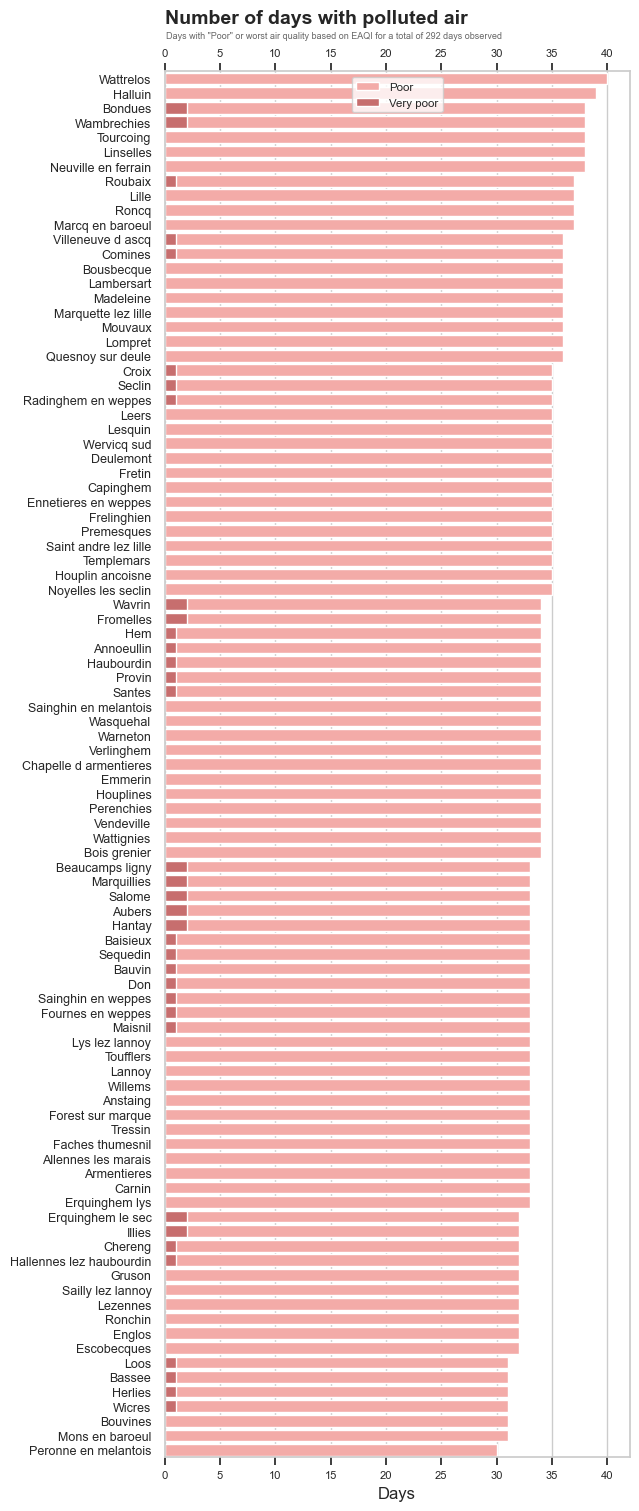

In [281]:
# bar graph styling
plt.style.use("default") 
sns.set_theme(style="whitegrid")

# Tick Styling
mpl.rcParams['ytick.labelsize'] = '9'
mpl.rcParams['xtick.labelsize'] = '9'

# Legend Styling
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.fontsize'] = 'x-small'
mpl.rcParams["legend.loc"] = 'upper center'

# Title Styling
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlepad'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.titleweight'] = 'bold'

# Sorting df by Poor or worse
air_quality_days.sort_values(by=['days_4_plus', 'days_5_plus', 'days_6_plus'], ascending=False ,inplace=True)
air_quality_days

air_quality_days['city'] = air_quality_days['city'].str.capitalize()


# Plot generation
f, ax = plt.subplots(figsize=(6, 18))

# Bars with conditional display for extreme values
sns.set_color_codes("pastel")
sns.barplot(y='city', x='days_4_plus', data=air_quality_days, label='Poor', color='r')

sns.set_color_codes("muted")
sns.barplot(y='city', x='days_5_plus', data=air_quality_days, label='Very poor', color='r')

if air_quality_days['days_6_plus'].notnull().sum() > 0:
       sns.set_color_codes("muted")
       sns.barplot(y='city', x='days_6_plus', data=air_quality_days, label='Extremely poor', color='k')

# Add legend, title and labels
ax.set_title("Number of days with polluted air")
ax.set(xlabel="Days",
       ylabel='')
ax.legend(ncol=1, frameon=True)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True, labelsize=8)

# Subtitle
ax.text(x=.138, y=3.068, 
        s="Days with \"Poor\" or worst air quality based on EAQI for a total of " + str(days) + " days observed",
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6.5, 
        alpha=.7)


Moderate or worse air quality days

Text(0.138, 3.068, 'Days with "Moderate" or worst air quality based on EAQI for a total of 292 days observed')

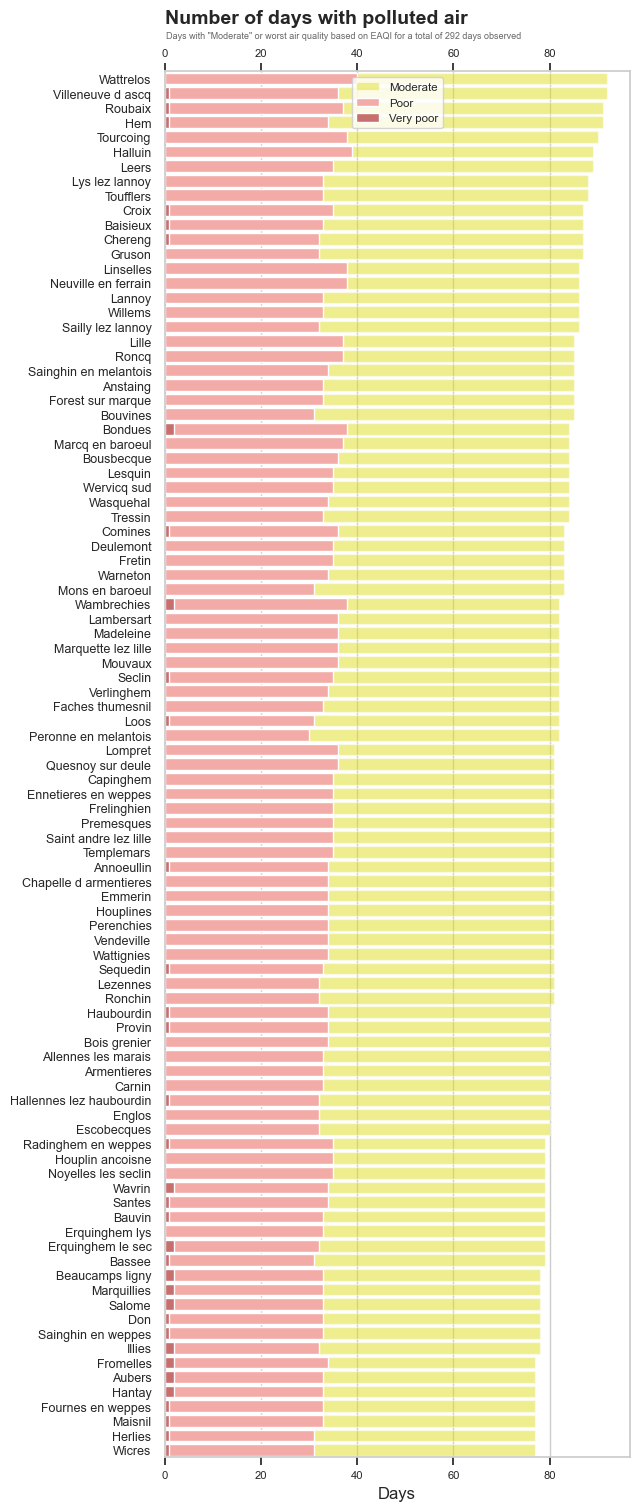

In [280]:
# bar graph styling
plt.style.use("default") 
sns.set_theme(style="whitegrid")

# Tick Styling
mpl.rcParams['ytick.labelsize'] = '9'
mpl.rcParams['xtick.labelsize'] = '9'

# Legend Styling
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.fontsize'] = 'x-small'
mpl.rcParams["legend.loc"] = 'upper center'

# Title Styling
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlepad'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.titleweight'] = 'bold'

# Sorting df by Moderate or worse
air_quality_days.sort_values(by=['days_3_plus', 'days_4_plus', 'days_5_plus', 'days_6_plus'], ascending=False ,inplace=True)
air_quality_days

air_quality_days['city'] = air_quality_days['city'].str.capitalize()


# Plot generation
f, ax = plt.subplots(figsize=(6, 18))

# Bars with conditional display for extreme values
sns.set_color_codes("pastel")
sns.barplot(y='city', x='days_3_plus', data=air_quality_days, label='Moderate', color='yellow', alpha=0.5)

sns.set_color_codes("pastel")
sns.barplot(y='city', x='days_4_plus', data=air_quality_days, label='Poor', color='r')

sns.set_color_codes("muted")
sns.barplot(y='city', x='days_5_plus', data=air_quality_days, label='Very poor', color='r')

if air_quality_days['days_6_plus'].notnull().sum() > 0:
       sns.set_color_codes("muted")
       sns.barplot(y='city', x='days_6_plus', data=air_quality_days, label='Extremely poor', color='k')

# Add legend, title and labels
ax.set_title("Number of days with polluted air")
ax.set(xlabel="Days",
       ylabel='')
ax.legend(ncol=1, frameon=True)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True, labelsize=8)

# Subtitle
ax.text(x=.138, y=3.068, 
        s="Days with \"Moderate\" or worst air quality based on EAQI for a total of " + str(days) + " days observed",
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6.5, 
        alpha=.7)



#### 3.3 Evolution of each polluant measurement in each city versus the agglomeration average

Customizing line plot style

In [262]:
# Reset to default plot style just in case
plt.style.use("default") 

# Adjusting plot style within mpl.rcParams in order to easily re-use the parameters for other projects
# find default figure with mpl.rcParams.keys()

# Colors 
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1879CE', '#FC4F30', '#3EBCD2', '#379A8B', '#EBB434', '#758D99']) #colors

# Style spines
mpl.rcParams['axes.linewidth'] = 0.8  # Spine edge line width
mpl.rcParams['axes.spines.top'] = False # Removing top spine
mpl.rcParams['axes.spines.left'] = True # default 
mpl.rcParams['axes.spines.right'] = False # Removing right spine
mpl.rcParams['axes.spines.bottom'] = True # default

# Set line styling for line plots
mpl.rcParams['lines.linewidth'] = 2 # line width
mpl.rcParams['lines.solid_capstyle'] = 'butt' # Makes a square ending of the line stopping at datapoint

# Grid style
mpl.rcParams['axes.grid'] = True # Adding grid
mpl.rcParams['axes.grid.axis'] = 'y' # default = 'both'
mpl.rcParams['grid.linewidth'] = 0.8 
mpl.rcParams['grid.color'] = '#b0b0b0'
mpl.rcParams['axes.axisbelow'] = True # default = 'line'

# Set spacing for figure and also DPI.
mpl.rcParams['figure.subplot.left'] = 0.125
mpl.rcParams['figure.subplot.right'] = 0.90
mpl.rcParams['figure.subplot.bottom'] = 0.10
mpl.rcParams['figure.subplot.top'] = 0.88
#mpl.rcParams['figure.figsize'] = 8, 4.8
mpl.rcParams['figure.dpi'] = 100

# Legend Styling
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.fontsize'] = 'x-small'
mpl.rcParams["legend.loc"] = 'best'

# Properties for saving the figure. Ensure a high DPI when saving so we have a good resolution.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.facecolor'] = 'white'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.2

# Title styling
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlepad'] = 20
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.titleweight'] = 'bold'

# Setting font sizes and spacing
mpl.rcParams['axes.labelsize'] = 'small'
mpl.rcParams['xtick.labelsize'] = 'x-small'
mpl.rcParams['ytick.labelsize'] = 'small'
mpl.rcParams['font.size'] = 10
mpl.rcParams['xtick.major.pad'] = 3.5
mpl.rcParams['ytick.major.pad'] = 3.5

Evolution of each polluant measurement in Lille versus aglomeration average

Text(0.08, 0.06, 'Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr')

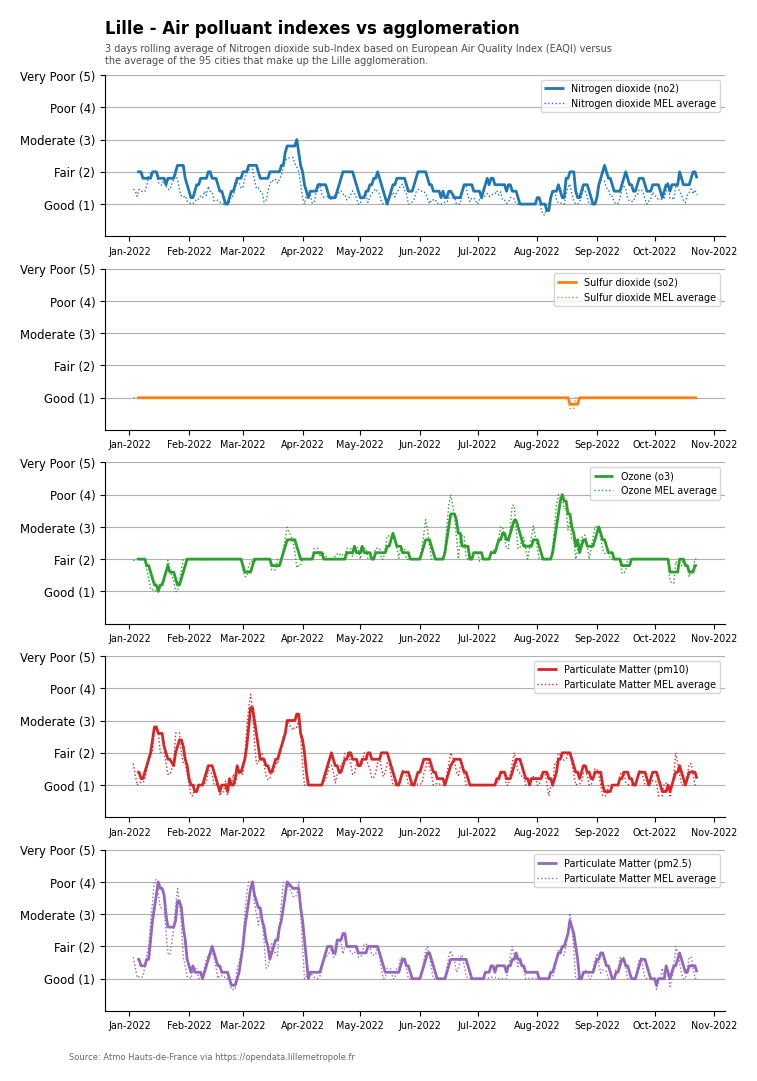

In [263]:
# Create all plots
fig, axs = plt.subplots(5, 1, figsize=(8, 12))
axs[0].plot(df.loc[('lille'), ('no2')].rolling(window=5).mean(), color='C0')
axs[0].plot(df.loc[(slice(None),),('no2')].groupby('date').agg('mean').rolling(window=3).mean(), color='C0', linewidth=1, linestyle=':')
axs[1].plot(df.loc[('lille'), ('so2')].rolling(window=5).mean(), color='C1')
axs[1].plot(df.loc[(slice(None),),('so2')].groupby('date').agg('mean').rolling(window=3).mean(), color='C1', linewidth=1, linestyle=':')
axs[2].plot(df.loc[('lille'), ('o3')].rolling(window=5).mean(), color='C2')
axs[2].plot(df.loc[(slice(None),),('o3')].groupby('date').agg('mean').rolling(window=3).mean(), color='C2', linewidth=1, linestyle=':')
axs[3].plot(df.loc[('lille'), ('pm10')].rolling(window=5).mean(), color='C3')
axs[3].plot(df.loc[(slice(None),),('pm10')].groupby('date').agg('mean').rolling(window=3).mean(), color='C3', linewidth=1, linestyle=':')
axs[4].plot(df.loc[('lille'), ('pm2-5')].rolling(window=5).mean(), color='C4')
axs[4].plot(df.loc[(slice(None),),('pm2-5')].groupby('date').agg('mean').rolling(window=3).mean(), color='C4', linewidth=1, linestyle=':')

# Format all plots
for ax in axs:
        ax.set_ylim(bottom=0, top=5)
        ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Main title
axs[0].set_title("Lille - Air polluant indexes vs agglomeration", pad=30)

# legends
axs[0].legend(['Nitrogen dioxide (no2)', 'Nitrogen dioxide MEL average'])
axs[1].legend(['Sulfur dioxide (so2)', 'Sulfur dioxide MEL average'])
axs[2].legend(['Ozone (o3)', 'Ozone MEL average'])
axs[3].legend(['Particulate Matter (pm10)', 'Particulate Matter MEL average'])
axs[4].legend(['Particulate Matter (pm2.5)', 'Particulate Matter MEL average'])

# Subtitle
axs[0].text(x=.125, y=.89, 
        s="3 days rolling average of Nitrogen dioxide sub-Index based on European Air Quality Index (EAQI) versus \nthe average of the 95 cities that make up the Lille agglomeration.", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=7, 
        alpha=.7)

# Source text
axs[4].text(x=.08, y=0.06, 
        s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)

Exporting a .png of for each city of the agglomeration

In [264]:
# Generating a set of cities
index_list = list(df.index.values)

set_city = set()
for i in index_list:
    set_city.add(i[0])

In [265]:
created_files = 0

for i in set_city:
        # Create all plots
        fig, axs = plt.subplots(5, 1, figsize=(8, 12))
        axs[0].plot(df.loc[(i), ('no2')].rolling(window=5).mean(), color='C0')
        axs[0].plot(df.loc[(slice(None),),('no2')].groupby('date').agg('mean').rolling(window=3).mean(), color='C0', linewidth=1, linestyle=':')
        axs[1].plot(df.loc[(i), ('so2')].rolling(window=5).mean(), color='C1')
        axs[1].plot(df.loc[(slice(None),),('so2')].groupby('date').agg('mean').rolling(window=3).mean(), color='C1', linewidth=1, linestyle=':')
        axs[2].plot(df.loc[(i), ('o3')].rolling(window=5).mean(), color='C2')
        axs[2].plot(df.loc[(slice(None),),('o3')].groupby('date').agg('mean').rolling(window=3).mean(), color='C2', linewidth=1, linestyle=':')
        axs[3].plot(df.loc[(i), ('pm10')].rolling(window=5).mean(), color='C3')
        axs[3].plot(df.loc[(slice(None),),('pm10')].groupby('date').agg('mean').rolling(window=3).mean(), color='C3', linewidth=1, linestyle=':')
        axs[4].plot(df.loc[(i), ('pm2-5')].rolling(window=5).mean(), color='C4')
        axs[4].plot(df.loc[(slice(None),),('pm2-5')].groupby('date').agg('mean').rolling(window=3).mean(), color='C4', linewidth=1, linestyle=':')

        # Format all plots
        for ax in axs:
                ax.set_ylim(bottom=0, top=5)
                ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

        # Main title
        axs[0].set_title(str(i).capitalize() + " - Air polluants vs agglomeration average", pad=30)

        # legends
        axs[0].legend(['Nitrogen dioxide (no2)', 'Nitrogen dioxide MEL average'])
        axs[1].legend(['Sulfur dioxide (so2)', 'Sulfur dioxide MEL average'])
        axs[2].legend(['Ozone (o3)', 'Ozone MEL average'])
        axs[3].legend(['Particulate Matter (pm10)', 'Particulate Matter MEL average'])
        axs[4].legend(['Particulate Matter (pm2.5)', 'Particulate Matter MEL average'])

        # Subtitle
        axs[0].text(x=.125, y=.89, 
                s="3 days rolling average of Nitrogen dioxide sub-Index based on European Air Quality Index (EAQI) standars versus \nthe average of the 95 cities that make up the Lille agglomeration.", 
                transform=fig.transFigure, 
                ha='left', 
                fontsize=7, 
                alpha=.7)

        # Source text
        axs[4].text(x=.08, y=0.06, 
                s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
                transform=fig.transFigure, 
                ha='left', 
                fontsize=6, 
                alpha=.6)
        
        # Export plot as .png
        timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
        file_name = str(i) + '_air-polluants-vs-agglomeration_' + timestr + ".png"
        plt.savefig(data_out + file_name)
        created_files += 1
    
        # Avoid display with close method
        plt.close(fig)

print(f"files created: {created_files}")

files created: 95


#### 3.4 Evolution of pollutant measurements by city

Evolution of each polluant measurement in Lille

Text(0.08, 0, 'Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr')

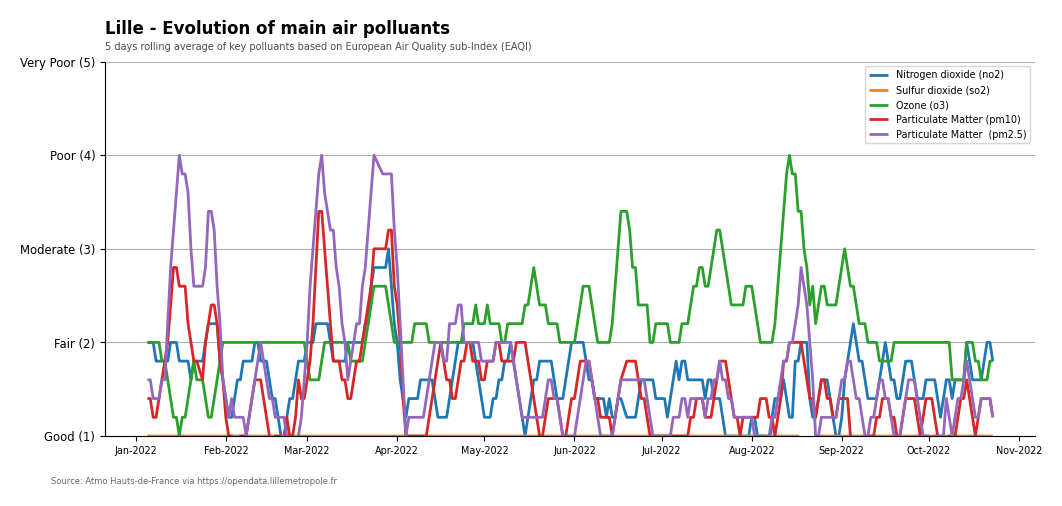

In [266]:
# Plot data

fig, ax = plt.subplots(figsize=(12, 4.8)) # equivalent to  fig = plt.figure()   ax = fig.add_subplot(1, 1)
no2_lille = df.loc[('lille'), ('no2')].rolling(window=5).mean()
so2_lille = df.loc[('lille'), ('so2')].rolling(window=5).mean()
o3_lille = df.loc[('lille'), ('o3')].rolling(window=5).mean()
pm10_lille = df.loc[('lille'), ('pm10')].rolling(window=5).mean()
pm25_lille = df.loc[('lille'), ('pm2-5')].rolling(window=5).mean()
ax.plot(no2_lille)
ax.plot(so2_lille)
ax.plot(o3_lille)
ax.plot(pm10_lille)
ax.plot(pm25_lille)


# Titles, labels and axis display
ax.legend(['Nitrogen dioxide (no2)', 'Sulfur dioxide (so2)', 'Ozone (o3)', 'Particulate Matter (pm10)', 'Particulate Matter  (pm2.5)'])
ax.set_title("Lille - Evolution of main air polluants")
#ax.set_xlabel("Date")
ax.set_ylim(bottom=1, top=5)
ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Add in title and subtitle
ax.text(x=.125, y=.905, 
        s="5 days rolling average of key polluants based on European Air Quality sub-Index (EAQI)", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=7, 
        alpha=.7)

# Set source text
ax.text(x=.08, y=0, 
        s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=6, 
        alpha=.6)


Exporting a .png for each city of the agglomeration

In [267]:
# Looping through to set of cities to generate a plot for each city
created_files = 0
for i in set_city:
    fig, ax = plt.subplots(figsize=(12, 4.8))
    ax.plot(df.loc[(i), ('no2')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('so2')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('o3')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('pm10')].rolling(window=5).mean())
    ax.plot(df.loc[(i), ('pm2-5')].rolling(window=5).mean())
    
    # Titles, labels and axis display
    ax.legend(['Nitrogen dioxide (no2)', 'Sulfur dioxide (so2)', 'Ozone (o3)', 'Particulate Matter (pm10)', 'Particulate Matter  (pm2.5)'])
    ax.set_title(str((i)).capitalize() + " - Evolution of main air polluants")
    ax.set_xlabel("Date")
    ax.set_ylim(bottom=1, top=5)
    ax.set_yticks(ticks=[1, 2, 3, 4, 5], labels=['Good (1)', 'Fair (2)', 'Moderate (3)', 'Poor (4)', 'Very Poor (5)'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    
    # Add in title and subtitle
    ax.text(x=.125, y=.905, 
            s="5 days rolling average of key polluants based on European Air Quality sub-Index (EAQI)", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=7, 
            alpha=.7)
    
    # Set source text
    ax.text(x=.08, y=0, 
            s="Source: Atmo Hauts-de-France via https://opendata.lillemetropole.fr", 
            transform=fig.transFigure, 
            ha='left', 
            fontsize=6, 
            alpha=.6)
    
    # Export plot as PNG
    timestr = time.strftime("%Y-%m-%d_%H-%M-%S")
    file_name = str(i) + '_sub_indexes-over-time_' + timestr + ".png"
    plt.savefig(data_out + file_name)
    created_files += 1
    
    # Avoid display with close method
    plt.close(fig)
    
print(f"files created: {created_files}")

files created: 95


## Sandbox

To do: 
- use only one timestamp for files
- deal with "0" values

<AxesSubplot: xlabel='month'>

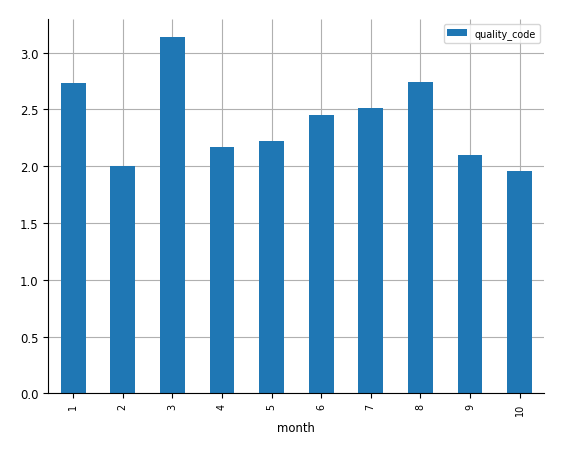

In [268]:
df.loc[('lille'), ['quality_code', 'month']].groupby('month').aggregate('mean').plot(kind='bar')

<AxesSubplot: xlabel='month'>

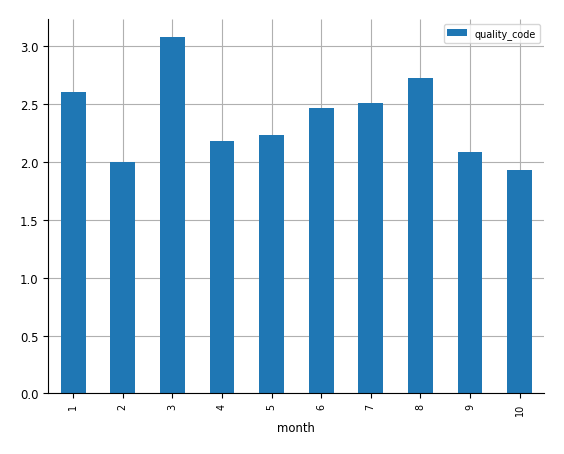

In [269]:
df.loc[(slice(None)), ['quality_code', 'month']].groupby('month').aggregate('mean').plot(kind='bar')